In [757]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.legend import Legend
import matplotlib.patches as mpatches
import seaborn as sns
#from statsmodels.graphics.mosaicplot import mosaic
import io
import requests

%matplotlib inline

# Etapa 1: Depuracion del dataset

### Lectura de datos del CSV y seteo del tipo para cada columna

In [758]:
url="https://raw.githubusercontent.com/joacols/TP_orga_de_datos/main/Entrenamieto_ECI_2020.csv"
s=requests.get(url).content
df=pd.read_csv(io.StringIO(s.decode('utf-8')),

#df = pd.read_csv('Entrenamieto_ECI_2020.csv',
dtype={
'ID': np.int64,
'Pricing, Delivery_Terms_Quote_Approval': np.int64,
'Pricing, Delivery_Terms_Approved': np.int64,
'Bureaucratic_Code_0_Approval': np.int64,
'Bureaucratic_Code_0_Approved': np.int64,
'Submitted_for_Approval': np.int64,
'Opportunity_ID': np.int64,
#'Sales_Contract_No': np.int64,
'Delivery_Year': np.int64,
'Total_Power': np.int64,
#'Price':np.float64,
'ASP':np.float64,
'ASP_(converted)':np.float64,
'Total_Amount':np.float64},
parse_dates=[
'Account_Created_Date',
'Planned_Delivery_Start_Date',
'Planned_Delivery_End_Date',
'Opportunity_Created_Date',
'Last_Activity',
'Quote_Expiry_Date',
'Actual_Delivery_Date',
'Last_Modified_Date'
])

df.head()

,ID,Region,Territory,"Pricing, Delivery_Terms_Quote_Appr","Pricing, Delivery_Terms_Approved",Bureaucratic_Code_0_Approval,Bureaucratic_Code_0_Approved,Submitted_for_Approval,Bureaucratic_Code,Account_Created_Date,...,Delivery_Quarter,Delivery_Year,Actual_Delivery_Date,TRF,Total_Amount_Currency,Total_Amount,Total_Taxable_Amount_Currency,Total_Taxable_Amount,Stage,Prod_Category_A
0,27761,EMEA,None,1,1,1,1,0,Bureaucratic_Code_4,2015-06-16,...,Q2,2016,NaT,10,EUR,5272800.0,EUR,5272800.0,Closed Lost,Prod_Category_A_None
1,27760,EMEA,None,0,0,0,0,0,Bureaucratic_Code_4,2015-06-16,...,Q1,2016,NaT,0,EUR,48230.0,EUR,48230.0,Closed Won,Prod_Category_A_None
2,27446,Americas,NW America,0,0,0,0,0,Bureaucratic_Code_4,2015-04-21,...,Q1,2016,NaT,0,USD,83865.6,USD,83865.6,Closed Won,Prod_Category_A_None
3,16808,Americas,NW America,1,0,1,0,0,Bureaucratic_Code_5,2013-07-27,...,Q1,2018,NaT,14,USD,7421881.5,USD,7421881.5,Closed Lost,Prod_Category_A_None
4,16805,Americas,NW America,1,0,1,0,0,Bureaucratic_Code_5,2013-07-27,...,Q1,2018,NaT,25,USD,13357192.5,USD,13357192.5,Closed Lost,Prod_Category_A_None


In [759]:
#df[df['Last_Activity']!='NaT']

### Corrección de los valores de las columnas Price y Sales_Contract_No

Exploro columnas que tienen valores None y Other y reemplazo esos valores por NaN:

In [760]:
df['Price'].head()

0    None
1    None
2    None
3    0.42
4    0.42
Name: Price, dtype: object

In [761]:
df['Sales_Contract_No'].head()


0    None
1      39
2     760
3    None
4    None
Name: Sales_Contract_No, dtype: object

In [762]:
df['Price'].replace('None',np.NaN,inplace=True)
df['Price'].replace('Other',np.NaN,inplace=True)

#df.loc[df['Price'] =='None'] = np.NaN
df['Price'].head()

0     NaN
1     NaN
2     NaN
3    0.42
4    0.42
Name: Price, dtype: object

In [763]:
df['Sales_Contract_No'].replace('None',np.NaN,inplace=True)
df['Sales_Contract_No'].replace('Other',np.NaN,inplace=True)
df['Sales_Contract_No'].head()

0    NaN
1     39
2    760
3    NaN
4    NaN
Name: Sales_Contract_No, dtype: object

In [764]:
df = df.astype({"Price": np.float64, "Sales_Contract_No": np.float64})

### Creación de la columna Delivery_Month a partir de Delivery_Year (que contiene año y mes de entrega)

Genero la columna Delivery_Month a partir de Month:

In [765]:
df[['Month','Delivery_Year']].head()

,Month,Delivery_Year
0,2016 - 5,2016
1,2016 - 1,2016
2,2016 - 1,2016
3,2018 - 2,2018
4,2018 - 2,2018


In [766]:
df['Month'].head()

0    2016 - 5
1    2016 - 1
2    2016 - 1
3    2018 - 2
4    2018 - 2
Name: Month, dtype: object

In [767]:
df["Delivery_Month"] = df['Month'].map(lambda x: x.split('-')[1])
df = df.astype({"Delivery_Month": np.int8})

df["Delivery_Month"].head()

0    5
1    1
2    1
3    2
4    2
Name: Delivery_Month, dtype: int8

In [768]:
df.head()

,ID,Region,Territory,"Pricing, Delivery_Terms_Quote_Appr","Pricing, Delivery_Terms_Approved",Bureaucratic_Code_0_Approval,Bureaucratic_Code_0_Approved,Submitted_for_Approval,Bureaucratic_Code,Account_Created_Date,...,Delivery_Year,Actual_Delivery_Date,TRF,Total_Amount_Currency,Total_Amount,Total_Taxable_Amount_Currency,Total_Taxable_Amount,Stage,Prod_Category_A,Delivery_Month
0,27761,EMEA,None,1,1,1,1,0,Bureaucratic_Code_4,2015-06-16,...,2016,NaT,10,EUR,5272800.0,EUR,5272800.0,Closed Lost,Prod_Category_A_None,5
1,27760,EMEA,None,0,0,0,0,0,Bureaucratic_Code_4,2015-06-16,...,2016,NaT,0,EUR,48230.0,EUR,48230.0,Closed Won,Prod_Category_A_None,1
2,27446,Americas,NW America,0,0,0,0,0,Bureaucratic_Code_4,2015-04-21,...,2016,NaT,0,USD,83865.6,USD,83865.6,Closed Won,Prod_Category_A_None,1
3,16808,Americas,NW America,1,0,1,0,0,Bureaucratic_Code_5,2013-07-27,...,2018,NaT,14,USD,7421881.5,USD,7421881.5,Closed Lost,Prod_Category_A_None,2
4,16805,Americas,NW America,1,0,1,0,0,Bureaucratic_Code_5,2013-07-27,...,2018,NaT,25,USD,13357192.5,USD,13357192.5,Closed Lost,Prod_Category_A_None,2


In [769]:
df['Submitted_for_Approval'].head()

0    0
1    0
2    0
3    0
4    0
Name: Submitted_for_Approval, dtype: int64

### Corrección de los valores de la columna Total_Taxable_Amount

Agrupo los datos por Opportunity_Name y sumo los Total_Amount para obtener Real_Total_Taxable_Amount:

In [770]:
#testdf=df
testdf=df.groupby('Opportunity_Name').agg({'Total_Amount': 'sum'})#.reset_index()['Total_Amount']
testdf=testdf.rename(columns={'Total_Amount':'Real_Total_Taxable_Amount'})

Genero un dataframe que tenga el dataset y también la columna Real_Total_Taxable_Amount y chequeo si Real_Total_Taxable_Amount y Total_Taxable_Amount difieren:


In [771]:
df_merged=df.merge(testdf,on='Opportunity_Name')

#df_merged_inconsistence=df_merged[df_merged['Real_Total_Taxable_Amount']!=df_merged['Total_Taxable_Amount']]

df_merged_inconsistence=df_merged[ np.isclose(df_merged['Real_Total_Taxable_Amount'], df_merged['Total_Taxable_Amount'], rtol=1e-02, atol=1e-02, equal_nan=False)==False]

df_merged_inconsistence[['Opportunity_Name','Total_Amount','Real_Total_Taxable_Amount','Total_Taxable_Amount']].sort_values('Opportunity_Name', ascending=False).head()

#df_merged_inconsistence[]

,Opportunity_Name,Total_Amount,Real_Total_Taxable_Amount,Total_Taxable_Amount
1805,Opportunity_Name_9992,175190.4,175190.4,0.0
2217,Opportunity_Name_9914,10660557.6,10660557.6,0.0
16436,Opportunity_Name_9913,12801600.0,12801600.0,0.0
16655,Opportunity_Name_9912,6498375.0,38700000.0,0.0
16652,Opportunity_Name_9912,12801600.0,38700000.0,0.0


Chequeo si hay registros en los que Real_Total_Taxable_Amount y Total_Taxable_Amount difieren y que además Total_Taxable_Amount sea distinto de cero: 

In [772]:
df_merged_inconsistence.loc[df_merged_inconsistence['Total_Taxable_Amount']!=0,['Opportunity_Name','Total_Amount','Real_Total_Taxable_Amount','Total_Taxable_Amount']].head()

,Opportunity_Name,Total_Amount,Real_Total_Taxable_Amount,Total_Taxable_Amount
70,Opportunity_Name_12137,107250.0,317625.0,420750.0
71,Opportunity_Name_12137,103125.0,317625.0,420750.0
72,Opportunity_Name_12137,107250.0,317625.0,420750.0
1391,Opportunity_Name_12644,4250703.6,10057887.6,5841001.8
1392,Opportunity_Name_12644,653954.4,10057887.6,5841001.8


Como hay datos de Total_Taxable_Amount que no tienen los valores que corresponden, se corrige la columna con estableciendo los valores correctos:

In [773]:
df=df_merged.drop(['Total_Taxable_Amount'], axis=1)
df.rename(columns={'Real_Total_Taxable_Amount':'Total_Taxable_Amount'},inplace=True)
df

,ID,Region,Territory,"Pricing, Delivery_Terms_Quote_Appr","Pricing, Delivery_Terms_Approved",Bureaucratic_Code_0_Approval,Bureaucratic_Code_0_Approved,Submitted_for_Approval,Bureaucratic_Code,Account_Created_Date,...,Delivery_Year,Actual_Delivery_Date,TRF,Total_Amount_Currency,Total_Amount,Total_Taxable_Amount_Currency,Stage,Prod_Category_A,Delivery_Month,Total_Taxable_Amount
0,27761,EMEA,None,1,1,1,1,0,Bureaucratic_Code_4,2015-06-16,...,2016,NaT,10,EUR,5272800.00,EUR,Closed Lost,Prod_Category_A_None,5,5272800.00
1,27760,EMEA,None,0,0,0,0,0,Bureaucratic_Code_4,2015-06-16,...,2016,NaT,0,EUR,48230.00,EUR,Closed Won,Prod_Category_A_None,1,48230.00
2,27446,Americas,NW America,0,0,0,0,0,Bureaucratic_Code_4,2015-04-21,...,2016,NaT,0,USD,83865.60,USD,Closed Won,Prod_Category_A_None,1,83865.60
3,16808,Americas,NW America,1,0,1,0,0,Bureaucratic_Code_5,2013-07-27,...,2018,NaT,14,USD,7421881.50,USD,Closed Lost,Prod_Category_A_None,2,7421881.50
4,16805,Americas,NW America,1,0,1,0,0,Bureaucratic_Code_5,2013-07-27,...,2018,NaT,25,USD,13357192.50,USD,Closed Lost,Prod_Category_A_None,2,13357192.50
5,16802,Americas,NW America,1,0,1,0,0,Bureaucratic_Code_5,2013-07-27,...,2018,NaT,28,USD,14838277.50,USD,Closed Lost,Prod_Category_A_None,2,14838277.50
6,16799,Americas,NW America,1,0,1,0,0,Bureaucratic_Code_5,2013-07-27,...,2017,NaT,7,USD,2659494.60,USD,Closed Lost,Prod_Category_A_None,2,2659494.60
7,27455,Americas,NW America,1,1,1,1,0,Bureaucratic_Code_4,2015-04-21,...,2016,NaT,0,USD,50688.00,USD,Closed Won,Prod_Category_A_None,1,50688.00
8,24353,Japan,None,1,0,0,0,0,Bureaucratic_Code_5,2015-04-20,...,2016,NaT,0,JPY,15600.00,JPY,Closed Lost,Prod_Category_A_None,2,470400.00
9,24355,Japan,None,1,0,0,0,0,Bureaucratic_Code_5,2015-04-20,...,2016,NaT,0,JPY,4400.00,JPY,Closed Lost,Prod_Category_A_None,2,470400.00


### Análisis inicial

In [774]:
print("Análisis inicial:")
print(f"\nCantidad de filas: {df.shape[0]}")
print(f"\nCantidad de columnas: {df.shape[1]}")
print(f"\nCantidad de celdas con potencial informacion: {df.size}")
print("\nContenido de las primeras filas:")
df.head()

Análisis inicial:

Cantidad de filas: 16947

Cantidad de columnas: 53

Cantidad de celdas con potencial informacion: 898191

Contenido de las primeras filas:


,ID,Region,Territory,"Pricing, Delivery_Terms_Quote_Appr","Pricing, Delivery_Terms_Approved",Bureaucratic_Code_0_Approval,Bureaucratic_Code_0_Approved,Submitted_for_Approval,Bureaucratic_Code,Account_Created_Date,...,Delivery_Year,Actual_Delivery_Date,TRF,Total_Amount_Currency,Total_Amount,Total_Taxable_Amount_Currency,Stage,Prod_Category_A,Delivery_Month,Total_Taxable_Amount
0,27761,EMEA,None,1,1,1,1,0,Bureaucratic_Code_4,2015-06-16,...,2016,NaT,10,EUR,5272800.0,EUR,Closed Lost,Prod_Category_A_None,5,5272800.0
1,27760,EMEA,None,0,0,0,0,0,Bureaucratic_Code_4,2015-06-16,...,2016,NaT,0,EUR,48230.0,EUR,Closed Won,Prod_Category_A_None,1,48230.0
2,27446,Americas,NW America,0,0,0,0,0,Bureaucratic_Code_4,2015-04-21,...,2016,NaT,0,USD,83865.6,USD,Closed Won,Prod_Category_A_None,1,83865.6
3,16808,Americas,NW America,1,0,1,0,0,Bureaucratic_Code_5,2013-07-27,...,2018,NaT,14,USD,7421881.5,USD,Closed Lost,Prod_Category_A_None,2,7421881.5
4,16805,Americas,NW America,1,0,1,0,0,Bureaucratic_Code_5,2013-07-27,...,2018,NaT,25,USD,13357192.5,USD,Closed Lost,Prod_Category_A_None,2,13357192.5


### Análisis de datos faltantes

In [775]:
faltantes=pd.DataFrame(df.isnull().sum().sort_values(ascending=False),columns=['nulls'])
filas=len(df)
faltantes['porcentaje']=round(100*faltantes['nulls']/filas,2)
faltantes[faltantes['nulls']!=0]
#faltantes

,nulls,porcentaje
Actual_Delivery_Date,16947,100.00
Last_Activity,16947,100.00
Price,16591,97.90
Sales_Contract_No,6973,41.15
Quote_Expiry_Date,4625,27.29
ASP_(converted),3209,18.94
ASP,3209,18.94
Planned_Delivery_End_Date,75,0.44
Total_Amount,59,0.35


Las columnas 'Actual_Delivery_Date', 'Last_Activity' y 'Price' tienen entre un 100% y un 98% de datos faltantes, motivo por el cual se sacarán del dataframe

In [776]:
df=df.drop(['Actual_Delivery_Date', 'Last_Activity', 'Price'], axis=1)
df.head()

,ID,Region,Territory,"Pricing, Delivery_Terms_Quote_Appr","Pricing, Delivery_Terms_Approved",Bureaucratic_Code_0_Approval,Bureaucratic_Code_0_Approved,Submitted_for_Approval,Bureaucratic_Code,Account_Created_Date,...,Delivery_Quarter,Delivery_Year,TRF,Total_Amount_Currency,Total_Amount,Total_Taxable_Amount_Currency,Stage,Prod_Category_A,Delivery_Month,Total_Taxable_Amount
0,27761,EMEA,None,1,1,1,1,0,Bureaucratic_Code_4,2015-06-16,...,Q2,2016,10,EUR,5272800.0,EUR,Closed Lost,Prod_Category_A_None,5,5272800.0
1,27760,EMEA,None,0,0,0,0,0,Bureaucratic_Code_4,2015-06-16,...,Q1,2016,0,EUR,48230.0,EUR,Closed Won,Prod_Category_A_None,1,48230.0
2,27446,Americas,NW America,0,0,0,0,0,Bureaucratic_Code_4,2015-04-21,...,Q1,2016,0,USD,83865.6,USD,Closed Won,Prod_Category_A_None,1,83865.6
3,16808,Americas,NW America,1,0,1,0,0,Bureaucratic_Code_5,2013-07-27,...,Q1,2018,14,USD,7421881.5,USD,Closed Lost,Prod_Category_A_None,2,7421881.5
4,16805,Americas,NW America,1,0,1,0,0,Bureaucratic_Code_5,2013-07-27,...,Q1,2018,25,USD,13357192.5,USD,Closed Lost,Prod_Category_A_None,2,13357192.5


### Análisis de datos insuficientes

##### Brand

In [744]:
brand_counts=df['Brand'].value_counts()

In [745]:
print(brand_counts)

None        15911
Other         607
Brand_9       140
Brand_5        48
Brand_24       38
Brand_11       34
Brand_25       24
Brand_10       22
Brand_22       20
Brand_21       17
Brand_13       17
Brand_7        17
Brand_23       10
Brand_20       10
Brand_27        5
Brand_17        5
Brand_2         4
Brand_4         4
Brand_0         4
Brand_12        3
Brand_16        2
Brand_6         1
Brand_1         1
Brand_3         1
Brand_26        1
Brand_19        1
Name: Brand, dtype: int64


In [746]:
brand_counts_top=brand_counts[brand_counts>=20]

In [747]:
print(brand_counts_top)

None        15911
Other         607
Brand_9       140
Brand_5        48
Brand_24       38
Brand_11       34
Brand_25       24
Brand_10       22
Brand_22       20
Name: Brand, dtype: int64


##### Product_Type

In [748]:
product_type_counts=df['Product_Type'].value_counts()

In [749]:
print(product_type_counts)

None              15935
Other               515
Product_Type_3      179
Product_Type_1      142
Product_Type_0       94
Product_Type_4       73
Product_Type_2        9
Name: Product_Type, dtype: int64


##### Size

In [750]:
size_counts=df['Size'].value_counts()

In [751]:
print(size_counts)

None      15967
Other       394
Size_3      356
Size_4      196
Size_1       25
Size_0        7
Size_2        2
Name: Size, dtype: int64


#### Eliminacion de las 3 columnas anteriormente tratadas, por los motivos especificados


In [752]:
df2=df.drop(['Product_Type', 'Brand', 'Size'], axis=1)

### Exloración de cantidad de valores de cada tipo para ciertas columnas

In [777]:
df['Region'].value_counts()

Japan          4892
EMEA           4664
Americas       3945
APAC           3262
Middle East     184
Name: Region, dtype: int64

In [778]:
df['Territory'].value_counts()

None                    4999
Germany                 1682
NW America              1568
Australia               1208
India                    809
NE America               760
Japan                    681
Netherlands              533
SE America               493
France                   449
Singapore                441
United Kingdom           313
Belgium                  285
Italy                    283
Spain                    268
Central US               254
China (PRC)              218
SW America               206
Thailand                 173
Indonesia                154
Austria                  145
Philippines              109
Jordan                   102
Canada                    74
Luxembourg                70
Portugal                  66
Poland                    60
Vietnam                   51
Cyprus                    44
Denmark                   38
                        ... 
Kazakhstan                 7
Macedonia                  6
Pakistan                   6
Saudi Arabia  

In [779]:
df['Source '].value_counts()

None         9497
Source_7     2965
Source_9     1459
Source_11    1421
Source_13     786
Source_3      418
Source_1      137
Source_10     106
Source_2       86
Source_4       43
Source_6       19
Source_0        7
Source_12       2
Source_5        1
Name: Source , dtype: int64

In [780]:
df['Billing_Country'].value_counts()

Japan                                         4879
United States                                 3802
Germany                                       1979
Australia                                     1169
India                                          672
Netherlands                                    563
Singapore                                      432
France                                         396
Spain                                          317
Italy                                          295
United Kingdom                                 284
Belgium                                        226
China                                          222
Thailand                                       195
Austria                                        145
Indonesia                                      142
Philippines                                    138
Luxembourg                                     136
Canada                                         120
Jordan                         

In [781]:
df['Quote_Type'].value_counts()

Non Binding    16777
Binding          170
Name: Quote_Type, dtype: int64

In [782]:
df['Currency'].value_counts()

None    16052
EUR       475
USD       420
Name: Currency, dtype: int64

In [783]:
df['ASP_Currency'].value_counts()

USD    7361
JPY    4522
EUR    4503
AUD     556
GBP       5
Name: ASP_Currency, dtype: int64

In [784]:
df['ASP_(converted)_Currency'].value_counts()

USD    16947
Name: ASP_(converted)_Currency, dtype: int64

In [785]:
df['Delivery_Quarter'].value_counts()

Q2    4443
Q1    4317
Q4    4144
Q3    4043
Name: Delivery_Quarter, dtype: int64

In [786]:
df['Total_Taxable_Amount_Currency'].value_counts()

USD    7347
JPY    4525
EUR    4518
AUD     553
GBP       4
Name: Total_Taxable_Amount_Currency, dtype: int64

In [787]:
df['Delivery_Year'].value_counts()

2017    6318
2018    5830
2016    4371
2019     414
2020      14
Name: Delivery_Year, dtype: int64

In [788]:
df['ASP_(converted)'].value_counts()

0.38000    570
0.40000    497
0.36000    326
0.39000    325
0.00000    300
0.42000    294
0.40719    234
0.42982    230
0.47506    216
0.45244    214
0.41850    200
0.41285    178
0.49500    169
0.38750    168
0.37000    165
0.39588    157
0.49447    155
0.58437    153
0.45000    148
0.34000    141
0.44113    140
0.42416    138
0.35000    138
0.61135    138
0.38211    136
0.46000    134
0.38457    129
0.42500    126
0.43000    124
0.44952    121
          ... 
0.41093      1
0.46036      1
0.36478      1
0.39249      1
0.35990      1
0.53501      1
0.43220      1
0.78000      1
0.65200      1
0.60500      1
0.30992      1
0.35780      1
0.45789      1
0.43400      1
0.47167      1
0.70128      1
0.41875      1
0.25750      1
0.38300      1
0.39136      1
0.48251      1
1.70000      1
0.43140      1
0.40700      1
0.70000      1
0.32365      1
0.67868      1
0.43820      1
0.47300      1
0.30567      1
Name: ASP_(converted), Length: 441, dtype: int64

In [789]:
#df2['TRF'].value_counts()

# Etapa 2: Análisis exploratorio general con visualizaciones (tomando muchas columnas)

### Análisis de correlación de los datos sin tener en cuenta numeros identificatorios

Dos variables se correlacionan positivamente si cuando una variable aumenta, la otra tiende a aumentar

Text(0.5, 1.0, 'Análsis de correlación de los datos numéricos')

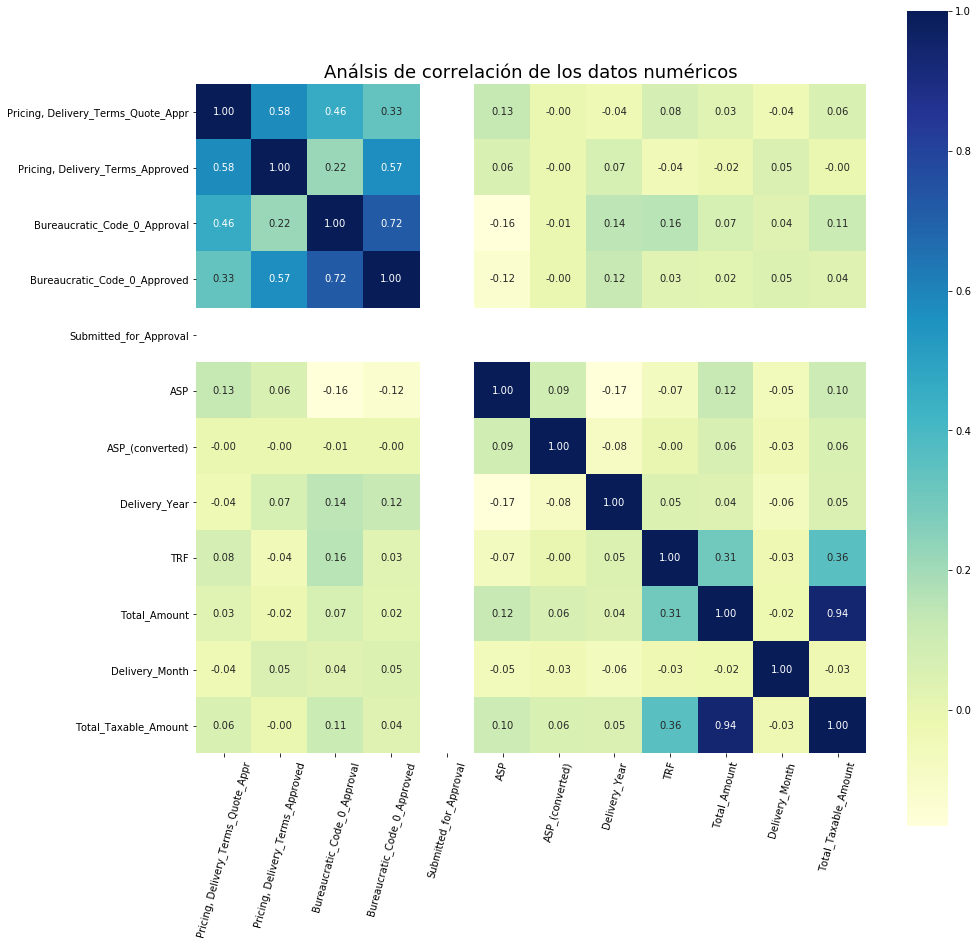

In [790]:
df_sin_ids=df.drop(['ID', 'Opportunity_ID', 'Sales_Contract_No'], axis=1)

plt.figure(figsize=(15, 15))
titulo='Análsis de correlación de los datos numéricos'

sns.heatmap(df_sin_ids.corr(), square=True, annot=True, fmt='.2f', cmap="YlGnBu");
plt.xticks(rotation=75)
plt.title(titulo,fontSize=18)


A continuación se muestra un cuadro con los cuatro pares de variables con mayor correlación positiva y su análisis:

|Variable 1 | Variable 2 |Correlacion |Análisis |
|:-|:-|:-|:-|
|Total_Amount|Total_Taxable_Amount|0.94|Estas variables están bastante correlacionadas probablemente porque una representa el monto total y la otra el monto total más impuestos|
|Bureaucratic_Code_0_Approval|Bureaucratic_Code_0_Approved|0.72|Esta correlación esta indicando que una alta cantidad de oportunidades que necesitan el código burocrático 0 lo suelen obtener|
|Pricing, Delivery_Terms_Quote_Approval|Pricing, Delivery_Terms_Approved|0.58|Esta correlación esta indicando que las oportunidades que necesitan aprobación especial la suelen obtener|
|Bureaucratic_Code_0_Approved|Pricing, Delivery_Terms_Approved|0.57|Esta correlación indica que las oportunidades que obtienen código burocrático 0 suelen obtener la aprobación especial|

# Etapa 3: Análisis exploratorio particular con visualizaciones (tomando solo algunas columnas)

In [791]:
### Análisis de estadístico (mín,máx,mediana) de los datos numéricos sin tener en cuenta numeros identificatorios

In [792]:
#df_numerico_sin_ids=df.drop(['ID', 'Opportunity_ID', 'Sales_Contract_No','Pricing, Delivery_Terms_Quote_Appr','Pricing, Delivery_Terms_Approved','Bureaucratic_Code_0_Approval','Bureaucratic_Code_0_Approved','Submitted_for_Approval'], axis=1)
#df_numerico_sin_ids.describe()

In [793]:
### Análisis de estadístico de la columna Delivery_Year

In [794]:
#ax = sns.boxplot(data=df['Delivery_Year'], orient="v", palette="Set2")

#plt.xlabel("Cantidad de oportunidades",fontSize=18)
#plt.ylabel("Año de entrega",fontSize=18)
#plt.title("Cantidad de oportunidades según Delivery_Year",fontSize=18)

### Análisis de distribución de años de entrega por categoría de Stage

In [795]:
df[df['Stage']=='Negotiation']
df['Stage'].value_counts()

Closed Won       9533
Closed Lost      7350
Proposal           35
Negotiation        18
Qualification      11
Name: Stage, dtype: int64

In [796]:
negotiation_oportunities=df[df['Stage']=='Negotiation']
negotiation_oportunities.select_dtypes('number')

,ID,"Pricing, Delivery_Terms_Quote_Appr","Pricing, Delivery_Terms_Approved",Bureaucratic_Code_0_Approval,Bureaucratic_Code_0_Approved,Submitted_for_Approval,Opportunity_ID,Sales_Contract_No,ASP,ASP_(converted),Delivery_Year,TRF,Total_Amount,Delivery_Month,Total_Taxable_Amount
15005,12825,1,1,1,1,0,9402,NaN,0.260,0.29408,2019,9,2314884.00,8,2314884.00
15173,5163,1,0,1,0,0,9579,NaN,40.000,0.35962,2019,0,8444800.00,6,8444800.00
15392,8552,1,1,1,1,0,9794,NaN,0.270,0.27000,2019,1,158197.05,1,158197.05
15393,8558,1,1,1,1,0,9795,NaN,0.310,0.31000,2019,0,79896.30,1,79896.30
15424,8585,1,1,1,1,0,9838,NaN,0.275,0.27500,2019,0,66882.75,1,140433.15
15425,8591,1,1,1,1,0,9838,NaN,0.280,0.28000,2019,0,43982.40,1,140433.15
15426,8596,1,1,1,1,0,9838,NaN,0.420,0.42000,2019,0,29568.00,1,140433.15
15927,9292,1,1,1,1,0,10419,NaN,0.380,0.38000,2019,2,722304.00,2,722304.00
15992,12942,1,1,1,1,0,10542,NaN,0.265,0.26500,2019,0,128901.30,2,264993.38
15993,12965,1,1,1,1,0,10542,NaN,0.265,0.26500,2019,1,136092.08,2,264993.38


Text(0.5, 1.0, 'Distribución de Delivery_Year por categoria de Stage')

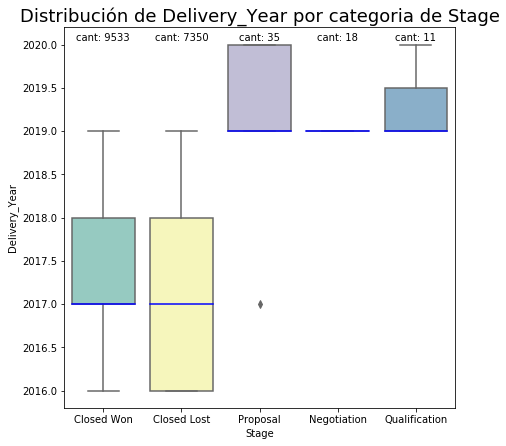

In [797]:
plt.figure(figsize=(7,7))    

ax = sns.boxplot(x="Stage", y="Delivery_Year", data=df,palette="Set3", order=["Closed Won", "Closed Lost", "Proposal","Negotiation","Qualification"])
 
# Calculate number of obs per group & median to position labels
medianas = df.groupby(['Stage'])['Delivery_Year'].max().values
nro_obs = df['Stage'].value_counts().values
nro_obs = [str(x) for x in nro_obs.tolist()]
nro_obs = ["cant: " + i for i in nro_obs]

for line in ax.get_lines()[4::6]:
    line.set_color('blue')

# Add it to the plot
vector = range(len(nro_obs))
for tick,label in zip(vector,ax.get_xticklabels()):
    #ax.text(vector[tick], medianas[tick] + 1.03, nro_obs[tick],horizontalalignment='center', color='black', weight='semibold')#, size='x-small')
    ax.text(vector[tick], medianas.max() + 0.05 , nro_obs[tick],horizontalalignment='center', color='black')#, weight='semibold')#, size='x-small')
    
plt.title("Distribución de Delivery_Year por categoria de Stage",fontSize=18)

Del análisis del gráfico se puede observar que:
* El Stage con más oportunidades es Closed Won (9533 oportunidades) seguido por Closed Lost (7350 oportunidades)

* Los Stage Proposal, Negotiation y Qualification representan una cantidad significativamente menor de oportunidades (35,18 y 11 oportunidades respectivamente)

* Para Closed Won:
    * El rango de años van desde el 2016 al 2019
    * El 50% corresponden al rango que va desde el año 2017 al año 2018
    * El año de entrega promedio tomando todas las oportunidades es 2017

* Para Closed Lost:
    * El rango de años van desde el 2016 al 2019
    * El 50% corresponden al rango que va desde el año 2016 al año 2018
    * El año de entrega promedio tomando todas las oportunidades es 2017

* Para Proposal:
    * El rango de años van desde el 2019 al 2020
    * El 50% corresponden al rango que va desde el año 2019 al año 2020
    * El año de entrega promedio tomando todas las oportunidades es 2019
    * Hay un valor anomalo correspondiente al año 2017

* Para Negotiation:
    * Todas las oportunidades asociadas al Stage Negotiation corresponden al año 2019
    * El año de entrega promedio tomando todas las oportunidades es 2019
    
* Para Qualification:
    * El rango de años van desde el 2019 al 2020
    * El 50% corresponden al año 2019
    * El año de entrega promedio tomando todas las oportunidades es 2019


In [798]:
### Análisis de estadístico de la columna Delivery_Month

In [799]:
#ax = sns.boxplot(data=df['Delivery_Month'], orient="v", palette="Set2")

#plt.xlabel("Cantidad de oportunidades",fontSize=18)
#plt.ylabel("Mes de entrega",fontSize=18)
#plt.title("Cantidad de oportunidades según Month_Year",fontSize=18)


### Análisis de distribución de meses de entrega por categoría de Stage

In [800]:
Delivery_Month_by_Stage=df.groupby(['Stage']).agg({'Delivery_Month': 'mean'}).sort_values('Delivery_Month', ascending=False)

Delivery_Month_by_Stage

,Delivery_Month
Stage,
Qualification,7.454545
Closed Won,6.648379
Closed Lost,6.091020
Proposal,5.171429
Negotiation,3.611111


In [801]:
df['Stage'].value_counts()

Closed Won       9533
Closed Lost      7350
Proposal           35
Negotiation        18
Qualification      11
Name: Stage, dtype: int64

Text(0.5, 1.0, 'Distribución de Delivery_Month por categoria de Stage')

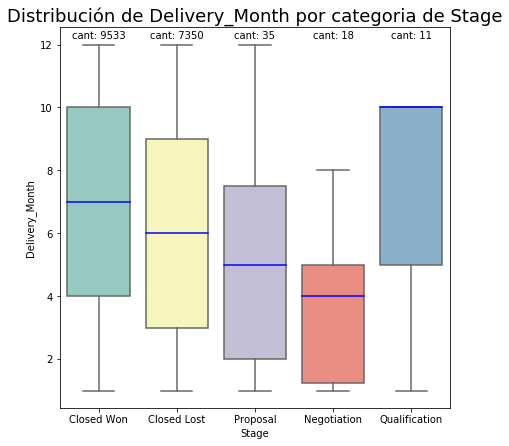

In [802]:
plt.figure(figsize=(7,7))    

ax = sns.boxplot(x="Stage", y="Delivery_Month", data=df,palette="Set3", order=["Closed Won", "Closed Lost", "Proposal","Negotiation","Qualification"])
 
# Calculate number of obs per group & median to position labels
medianas = df.groupby(['Stage'])['Delivery_Month'].max().values
nro_obs = df['Stage'].value_counts().values
nro_obs = [str(x) for x in nro_obs.tolist()]
nro_obs = ["cant: " + i for i in nro_obs]

for line in ax.get_lines()[4::6]:
    line.set_color('blue')

# Add it to the plot
vector = range(len(nro_obs))
for tick,label in zip(vector,ax.get_xticklabels()):
    #ax.text(vector[tick], medianas[tick] + 1.03, nro_obs[tick],horizontalalignment='center', color='black', weight='semibold')#, size='x-small')
    ax.text(vector[tick], medianas.max() + 0.2 , nro_obs[tick],horizontalalignment='center', color='black')#, weight='semibold')#, size='x-small')
    
plt.title("Distribución de Delivery_Month por categoria de Stage",fontSize=18)

Del análisis del gráfico se puede observar que:
* El Stage con más oportunidades es Closed Won (9533 oportunidades) seguido por Closed Lost (7350 oportunidades)

* Los Stage Proposal, Negotiation y Qualification representan una cantidad significativamente menor de oportunidades (35,18 y 11 oportunidades respectivamente)

* No hay valores atípicos

* Para Closed Won:
    * El rango de meses van del mes 1 al 12
    * El 50% corresponden al rango que va desde el mes 4 al mes 10
    * El mes de entrega promedio tomando todas las oportunidades es 7

* Para Closed Lost:
    * El rango de meses van del mes 1 al 12
    * El 50% corresponden al rango que va desde el mes 3 al mes 9
    * El mes de entrega promedio tomando todas las oportunidades es 6

* Para Proposal:
    * El rango de meses van del mes 1 al 12
    * El 50% corresponden al rango que va desde el mes 2 al mes 7
    * El mes de entrega promedio tomando todas las oportunidades es 5

* Para Negotiation:
    * El rango de meses van del mes 1 al 8
    * El 50% corresponden al rango que va desde el mes 1 al mes 5
    * El mes de entrega promedio tomando todas las oportunidades es 4
    
* Para Qualification:
    * El rango de meses van del mes 1 al 10
    * El 50% corresponden al rango que va desde el mes 5 al mes 10
    * El mes de entrega promedio tomando todas las oportunidades es 10


### Análisis de toneladas de refrigeración versus  precio promedio de venta (en USD) por estado de la oportunidad 

In [810]:
sns.__version__

'0.9.0'

Text(0.5, 1.0, 'TRF vs ASP_(converted) por valor de Stage')

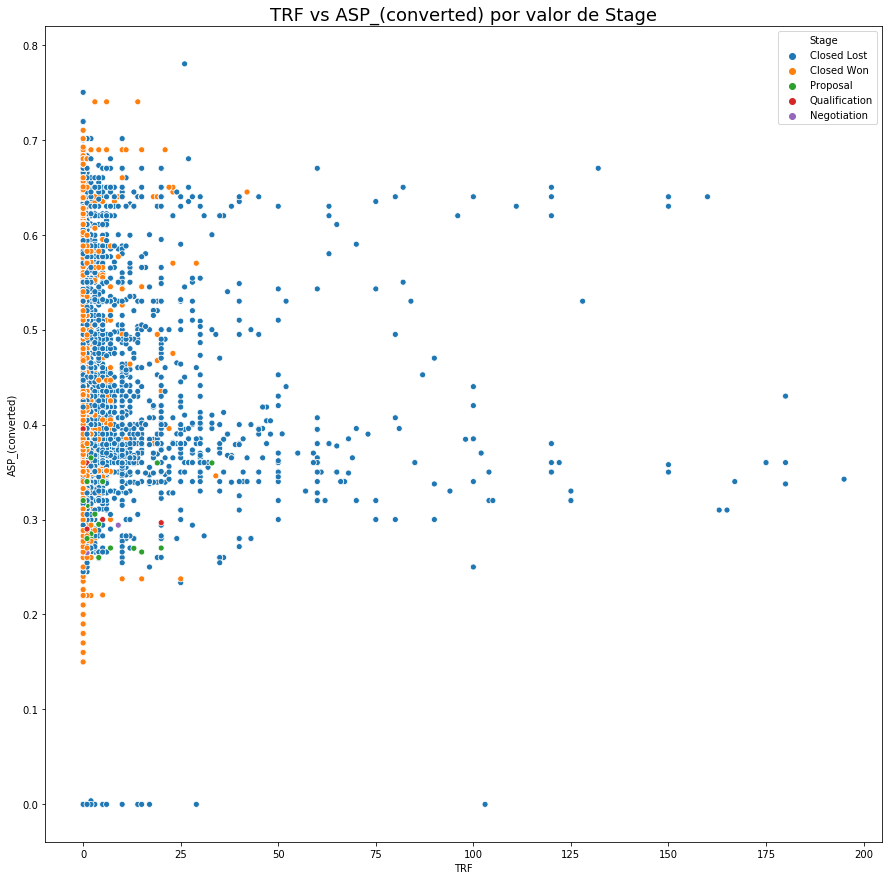

In [812]:
plt.figure(figsize=(15, 15))
#para que se pueda visualizar mejor el scatterplot, 
#voy a restringir el gráfico a los ASP menores a 1 y los TRF menores a 200
#ya que más allá de esos valores la cantidad de instancias son muy pocas

condicion1=df['ASP_(converted)'] <1
condicion2=df['TRF'] <200 
df_filtrado=df[condicion1 & condicion2]
sns.scatterplot(data=df_filtrado, x="TRF", y="ASP_(converted)", hue="Stage")#, style="Region")
plt.title("TRF vs ASP_(converted) por valor de Stage",fontSize=18)
#df_filtrado['Stage'].value_counts()

Del análisis del gráfico se puede observar que:
* A medida que aumentan las Toneladas De Refrigeración (TRF) disminuyen las oportunidades
* Se observan principalmente Stages con valor Closed Lost y Closed Won
* En la mayoría de las oportunidades su Stage es Closed Lost
* Las oportunidades cuyo Stage es Closed Win  generalmente corresponden a valores de TRF muy pequeños, llama la atención que la mayoría corressponden a 0 TRF
* La mayoría de las oportunidades tienen un valor de ASP_(converted) que va de 0,3 a 0,7 USD
* La mayoría de las oportunidades tienen un valor de TRF que va de 0 a 25

### Análisis de precio promedio de venta anual (en USD) por región

In [712]:
df[['Region','Delivery_Year','ASP_(converted)','ASP_(converted)_Currency']].head()

,Region,Delivery_Year,ASP_(converted),ASP_(converted)_Currency
0,EMEA,2016,0.58817,USD
1,EMEA,2016,0.59948,USD
2,Americas,2016,0.48000,USD
3,Americas,2018,0.53000,USD
4,Americas,2018,0.53000,USD


Precio de venta promedio, en dolares, por region y año:

In [713]:
precioVentaAnualPorRegion=df.groupby(['Region','Delivery_Year']).agg({'ASP_(converted)': 'mean'}).sort_values('ASP_(converted)', ascending=False)
precioVentaAnualPorRegion

ASP_(converted)
Region      Delivery_Year                 
Japan       2016                  0.615010
EMEA        2016                  0.605675
Americas    2016                  0.576835
            2018                  0.457564
APAC        2016                  0.451346
EMEA        2017                  0.431987
Middle East 2016                  0.423231
Japan       2017                  0.418712
Americas    2017                  0.397889
Japan       2018                  0.393486
Americas    2019                  0.393256
Japan       2019                  0.378218
EMEA        2018                  0.370901
Middle East 2017                  0.358714
APAC        2017                  0.357214
            2018                  0.353794
Middle East 2018                  0.343846
Japan       2020                  0.336584
APAC        2019                  0.324960
            2020                  0.315000
EMEA        2019                  0.313476
Middle East 2019                  0.299375
Americas    2020                  0.295000

Evolución del precio de venta promedio por región (2016-2020):

In [714]:
dato1=precioVentaAnualPorRegion.pivot_table(index='Region',columns='Delivery_Year',values='ASP_(converted)')
#dato1=dato.rename(index={'APAC': 'Asia Pacific (APAC)', 'EMEA': 'Europe Middle East Africa (EMEA)'})
dato1

Delivery_Year,2016,2017,2018,2019,2020
Region,,,,,
APAC,0.451346,0.357214,0.353794,0.324960,0.315000
Americas,0.576835,0.397889,0.457564,0.393256,0.295000
EMEA,0.605675,0.431987,0.370901,0.313476,NaN
Japan,0.615010,0.418712,0.393486,0.378218,0.336584
Middle East,0.423231,0.358714,0.343846,0.299375,NaN


Text(0, 0.5, 'Regiones')

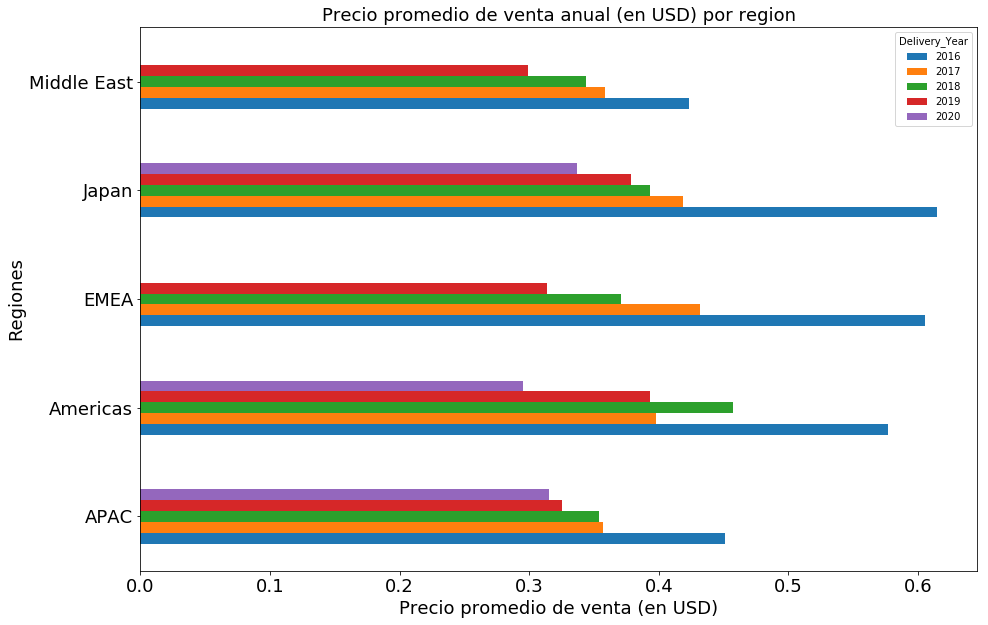

In [715]:
datos=dato1
titulo='Precio promedio de venta anual (en USD) por region'
etiqueta_x='Precio promedio de venta (en USD)'
etiqueta_y='Regiones'
tamanio=(15,10)
plot=datos.plot(kind='barh',figsize=tamanio,fontsize=18)
plot.set_title(titulo,fontSize=18)
plot.set_xlabel(etiqueta_x,fontSize=18)
plot.set_ylabel(etiqueta_y,fontSize=18)

#### Siglas:
* __EMEA:Europe Middle East Africa__
* __APAC:Asia Pacific__

Del análisis del gráfico se puede observar que:
* En las 5 regiones el precio promedio de venta disminuye año a año, con la salvedad de que en la región 'Americas', en el año 2018 hay un aumento para luego volver a caer en el año 2019
* 'Japan' es la región con más valor de precio promedio de venta del 2016 a 2020, salvo en el año 2018 en el que es superado por la región 'Americas'
* En las 5 regiones se da la situación de que el precio promedio de venta es mucho mayor en el año 2016 respecto de los años siguientes. Entre los años 2017 y 2020 las diferencias entre precios promedio de venta son mucho menores

### Análisis de Toneladas De Refrigeración por región

In [716]:
df[['Region','TRF']].groupby("Region").sum().head()

,TRF
Region,
APAC,10732
Americas,16258
EMEA,10840
Japan,953
Middle East,842


In [717]:
TRFAnualPorRegion=df.groupby(['Region','Delivery_Year']).agg({'TRF': 'mean'}).sort_values('TRF', ascending=False)
TRFAnualPorRegion

TRF
Region      Delivery_Year           
APAC        2019           20.653465
Americas    2019           14.931034
            2016            7.851124
Japan       2020            7.090909
EMEA        2019            6.938776
Middle East 2017            6.610390
Americas    2020            4.000000
Middle East 2018            3.756410
APAC        2018            3.596557
Americas    2017            3.334986
EMEA        2017            2.832571
Americas    2018            2.478286
APAC        2017            2.461901
EMEA        2016            2.268672
Middle East 2016            1.769231
Japan       2019            1.698795
EMEA        2018            1.628510
APAC        2016            1.281818
Middle East 2019            1.062500
APAC        2020            1.000000
Japan       2018            0.424419
            2017            0.126800
            2016            0.065666

In [718]:
dato2=TRFAnualPorRegion.pivot_table(index='Region',columns='Delivery_Year',values='TRF')
dato2

Delivery_Year,2016,2017,2018,2019,2020
Region,,,,,
APAC,1.281818,2.461901,3.596557,20.653465,1.000000
Americas,7.851124,3.334986,2.478286,14.931034,4.000000
EMEA,2.268672,2.832571,1.628510,6.938776,NaN
Japan,0.065666,0.126800,0.424419,1.698795,7.090909
Middle East,1.769231,6.610390,3.756410,1.062500,NaN


Text(0, 0.5, 'Regiones')

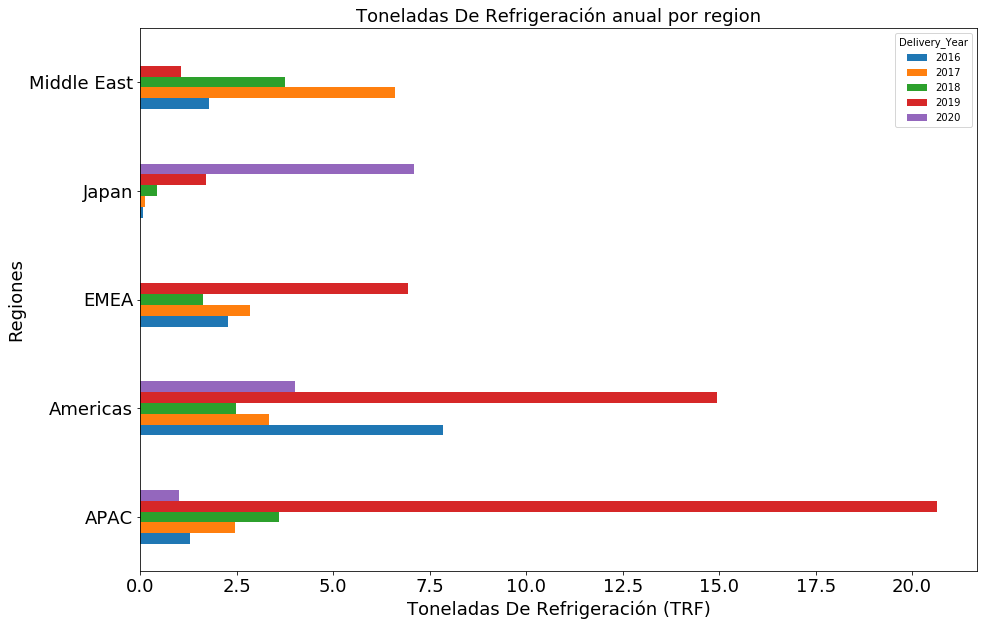

In [719]:
datos=dato2
titulo='Toneladas De Refrigeración anual por region'
etiqueta_x='Toneladas De Refrigeración (TRF)'
etiqueta_y='Regiones'
tamanio=(15,10)
plot=datos.plot(kind='barh',figsize=tamanio,fontsize=18)
plot.set_title(titulo,fontSize=18)
plot.set_xlabel(etiqueta_x,fontSize=18)
plot.set_ylabel(etiqueta_y,fontSize=18)

#### Siglas:
* __EMEA:Europe Middle East Africa__
* __APAC:Asia Pacific__

Del análisis del gráfico se puede observar que:
* En la región 'APAC' año a año van aumentando las TRF, ocurriendo un aumento muy grande en 2019, pero luego ocurre una caída muy grande en el año 2020 (llegando a los niveles más bajos para esa región)
* En la región 'Japan' año a año van aumentando las TRF, ocurriendo un aumento muy grande en 2020
* En la región 'EMEA' hay un aumento de las TRF del año 2016 al 2017, luego disminuye a el nivel más bajo para esta región en el año 2018, para finalmente alcanzar un gran aumento en el año 2019 (que representa el nivel más alto para esa región)
* En la región 'Americas' se observa una caida grande de las TRF del año 2016 al año 2017,continuando con una caída menor en el 2018 (que representa el nivel más bajo para esa región), luego se produce un gran aumento en el 2019 (siendo este el nivel más alto para la región) y finalmente en el año 2020 alcanza valores similares al año 2017
* En la región 'Middle East' se observa como aumentan las TRF hasta llegar al máximo para esa región en el 2017, en el 2018 se observa una disminución que continúa en el 2019 (año en el cual se llega al mínimo para esa región)

### Análisis porcentaje de entregas planificadas trimestrales por región de por región

In [720]:
df['Delivery_Quarter'].value_counts()

Q2    4443
Q1    4317
Q4    4144
Q3    4043
Name: Delivery_Quarter, dtype: int64

In [721]:
df_para_agrupar=df
df_para_agrupar['Cantidad']=1
df_para_agrupar[['Region','Delivery_Quarter','Cantidad']].head()

,Region,Delivery_Quarter,Cantidad
0,EMEA,Q2,1
1,EMEA,Q1,1
2,Americas,Q1,1
3,Americas,Q1,1
4,Americas,Q1,1


In [722]:
grouped=df_para_agrupar.groupby(['Region','Delivery_Quarter']).agg({'Cantidad': 'sum'})#.sort_values('Cantidad', ascending=False)
grouped

Cantidad
Region      Delivery_Quarter          
APAC        Q1                     767
            Q2                     846
            Q3                     799
            Q4                     850
Americas    Q1                     859
            Q2                     971
            Q3                    1067
            Q4                    1048
EMEA        Q1                    1073
            Q2                    1311
            Q3                    1179
            Q4                    1101
Japan       Q1                    1573
            Q2                    1281
            Q3                     930
            Q4                    1108
Middle East Q1                      45
            Q2                      34
            Q3                      68
            Q4                      37

In [723]:
pivoted=grouped.pivot_table(index='Region',columns='Delivery_Quarter',values='Cantidad')
pivoted

Delivery_Quarter,Q1,Q2,Q3,Q4
Region,,,,
APAC,767,846,799,850
Americas,859,971,1067,1048
EMEA,1073,1311,1179,1101
Japan,1573,1281,930,1108
Middle East,45,34,68,37


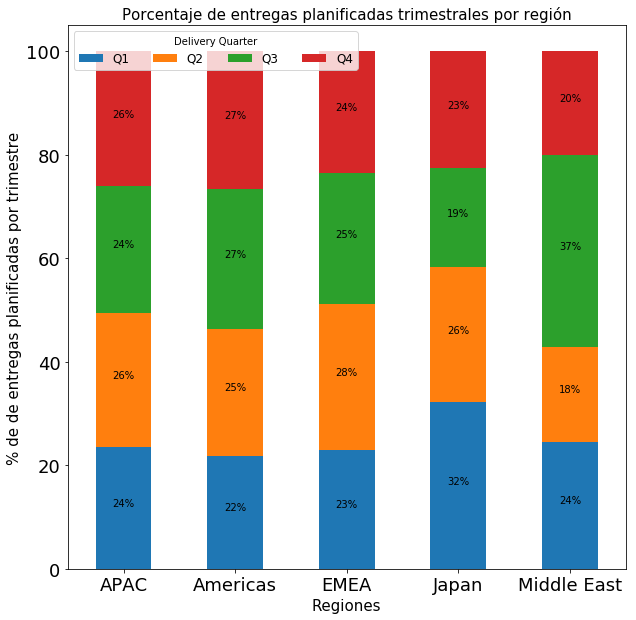

In [724]:
data = pivoted.apply(lambda r: r/r.sum()*100, axis=1)
ax=data.plot.bar(figsize=(10,10),stacked=True, rot=0,fontsize=18)
#display(data)

#plt.legend(loc='upper right', bbox_to_anchor=(0.1, 1.0), title="Del. Quarter")
ax.legend(ncol=len(df.Delivery_Quarter), bbox_to_anchor=(0, 1),
              loc='upper left', fontsize=12,title="Delivery Quarter")

for rec in ax.patches:
    alto = rec.get_height()
    posx_centrada=rec.get_x() + rec.get_width() / 2
    posy_centrada=rec.get_y() + alto / 2
    ax.text(posx_centrada, 
              posy_centrada,
              "{:.0f}%".format(alto),
              ha='center', 
              va='bottom')

plt.title('Porcentaje de entregas planificadas trimestrales por región',fontSize=15)
plt.xlabel('Regiones',fontSize=15)
plt.ylabel('% de de entregas planificadas por trimestre',fontSize=15)
plt.show()

#### Siglas:
* __EMEA:Europe Middle East Africa__
* __APAC:Asia Pacific__

### Del análisis del gráfico se puede observar que:
* Para la región de 'APAC' un 24% de las entregas planificadas corresponden el primer trimestre, un 26% al segundo,un 24% al tercero y un 26% al cuarto 
* Para la región de 'Americas' un 22% de las entregas planificadas corresponden el primer trimestre, un 25% al segundo,un 27% al tercero y un 27% al cuarto 
* Para la región de 'EMEA' un 23% de las entregas planificadas corresponden el primer trimestre, un 28% al segundo,un 25% al tercero y un 24% al cuarto 
* Para la región de 'Japan' un 32% de las entregas planificadas corresponden el primer trimestre, un 26% al segundo,un 19% al tercero y un 23% al cuarto 
* Para la región de 'Middle East' un 24% de las entregas planificadas corresponden el primer trimestre, un 18% al segundo,un 37% al tercero y un 20% al cuarto 

# ----------------------------------------------------------------------------------------------------------

***Veo si existe relacion entre antiguedad de la cuenta antes del inicio del tramite y los casos positivos. 

In [725]:
df[["Account_Name", "Account_Created_Date", ]].groupby("Account_Name")

# Anexo 1: Análisis exploratorio particular sin visualizaciones (tomando solo algunas columnas)

### Análisis de efectividad de las operaciones por año


In [726]:
df['Stage'].value_counts(normalize=True)


Closed Won       0.562518
Closed Lost      0.433705
Proposal         0.002065
Negotiation      0.001062
Qualification    0.000649
Name: Stage, dtype: float64

En general en el total de los datos la cantidad de operaciones exitosas es levemente superior a la cantidad de operaciones fallidas.

Ahora agrupamos las operaciones por año.

In [727]:
df.groupby(['Delivery_Year'])['Stage'].value_counts(normalize=True)

Delivery_Year  Stage        
2016           Closed Lost      0.511096
               Closed Won       0.488904
2017           Closed Won       0.648148
               Closed Lost      0.351694
               Proposal         0.000158
2018           Closed Won       0.548199
               Closed Lost      0.451801
2019           Closed Lost      0.628019
               Closed Won       0.253623
               Proposal         0.055556
               Negotiation      0.043478
               Qualification    0.019324
2020           Proposal         0.785714
               Qualification    0.214286
Name: Stage, dtype: float64

Vemos que para el año 2017 la cantidad de operaciones exitosas (Closed Won) duplico la cantidad de operaciones fallidas(Closed Lost)

Tambien podemos ver que para el año 2019 la cantidad de operaciones fallidas fue casi tres veces mas que la cantidad de operaciones exitosas.

### Análisis de efectividad de las operaciones por antiguedad de la cuenta del cliente

In [728]:
df['Anio_antiguead_cuenta']= pd.DatetimeIndex(df['Account_Created_Date']).year  


In [729]:
df.groupby(['Anio_antiguead_cuenta'])['Stage'].value_counts(normalize=True)

Anio_antiguead_cuenta  Stage        
2013                   Closed Won       0.702857
                       Closed Lost      0.296703
                       Negotiation      0.000220
                       Proposal         0.000220
2014                   Closed Lost      0.509051
                       Closed Won       0.490949
2015                   Closed Won       0.569312
                       Closed Lost      0.429876
                       Qualification    0.000609
                       Proposal         0.000203
2016                   Closed Won       0.515249
                       Closed Lost      0.480578
                       Proposal         0.002247
                       Qualification    0.001284
                       Negotiation      0.000642
2017                   Closed Lost      0.560181
                       Closed Won       0.433937
                       Negotiation      0.003620
                       Proposal         0.001357
                       Qualifica

Vemos que en general la proporcion de operaciones exitosas y fallidas es del 50 porciento, salvo para el año 2013 (los clientes mas antiguos) donde el porcentaje de operaciones exitosas es mas del doble que las operaciones fallidas.
Tambien podemos ver que para los clientes mas nuevos (2018) el porcentaje de operaciones fallidas (58%) es bastante superior a las operaciones exitosas (37%)

### Análisis de efectividad de las operaciones por region


In [56]:
df.groupby(['Region'])['Stage'].value_counts(normalize=True)

Region       Stage        
APAC         Closed Won       0.581239
             Closed Lost      0.415389
             Proposal         0.002452
             Qualification    0.000920
Americas     Closed Lost      0.542459
             Closed Won       0.454499
             Negotiation      0.002028
             Proposal         0.001014
EMEA         Closed Won       0.529803
             Closed Lost      0.469340
             Proposal         0.000643
             Negotiation      0.000214
Japan        Closed Won       0.679272
             Closed Lost      0.316026
             Proposal         0.002862
             Qualification    0.001635
             Negotiation      0.000204
Middle East  Closed Lost      0.652174
             Closed Won       0.271739
             Negotiation      0.043478
             Proposal         0.032609
Name: Stage, dtype: float64

Vemos que para la region de Japon el porcentaje de operaciones exitosas (casi 70%) es muy superior al resto de las regiones que son casi del 50%. 

Por otro lado para la region de Middle East el porcentaje de operaciones fallidas (65%) es muy superior al resto de las regiones.

# Anexo 2: Exploración de datos (sin visualización y sin análisis)

### Moda máxima y mínima del estado de la negociacion por región

In [730]:
dfRegion=df.groupby('Region')
dfRegion['Stage'].max()

Region
APAC           Qualification
Americas            Proposal
EMEA                Proposal
Japan          Qualification
Middle East         Proposal
Name: Stage, dtype: object

In [731]:
dfRegion['Stage'].min()

Region
APAC           Closed Lost
Americas       Closed Lost
EMEA           Closed Lost
Japan          Closed Lost
Middle East    Closed Lost
Name: Stage, dtype: object

### Moda máxima y mínima del estado de la negociacion por territorio

In [732]:
dfTerritory=df.groupby('Territory')
dfTerritory['Stage'].max()

Territory
Albania                   Closed Lost
Armenia                   Closed Lost
Australia               Qualification
Austria                    Closed Won
Belarus                   Closed Lost
Belgium                    Closed Won
Bosnia & Herzegovina      Closed Lost
Bulgaria                   Closed Won
Burma                     Closed Lost
Cambodia                   Closed Won
Canada                     Closed Won
Carribean                  Closed Won
Central America           Closed Lost
Central US                 Closed Won
China (PRC)                Closed Won
Croatia                   Closed Lost
Cyprus                     Closed Won
Czech Republic            Closed Lost
Denmark                    Closed Won
Egypt                     Closed Lost
Estonia                    Closed Won
France                     Closed Won
Georgia                   Closed Lost
Germany                    Closed Won
Greece                     Closed Won
Hungary                    Closed Won
In

In [733]:
dfTerritory['Stage'].min()

Territory
Albania                 Closed Lost
Armenia                 Closed Lost
Australia               Closed Lost
Austria                 Closed Lost
Belarus                 Closed Lost
Belgium                 Closed Lost
Bosnia & Herzegovina    Closed Lost
Bulgaria                Closed Lost
Burma                   Closed Lost
Cambodia                Closed Lost
Canada                  Closed Lost
Carribean               Closed Lost
Central America         Closed Lost
Central US              Closed Lost
China (PRC)             Closed Lost
Croatia                 Closed Lost
Cyprus                  Closed Lost
Czech Republic          Closed Lost
Denmark                 Closed Lost
Egypt                   Closed Lost
Estonia                 Closed Lost
France                  Closed Lost
Georgia                 Closed Lost
Germany                 Closed Lost
Greece                  Closed Lost
Hungary                 Closed Lost
India                   Closed Lost
Indonesia         

## Análisis de ocurrencias de algunos itemes

### Opportunity_Name


In [734]:
opportunity_name_counts=df['Opportunity_Name'].value_counts()

In [735]:
print(opportunity_name_counts)

Opportunity_Name_5036     36
Opportunity_Name_9795     36
Opportunity_Name_11461    26
Opportunity_Name_12179    26
Opportunity_Name_6835     24
Opportunity_Name_1661     18
Opportunity_Name_10945    16
Opportunity_Name_10946    16
Opportunity_Name_10131    16
Opportunity_Name_9628     16
Opportunity_Name_10944    16
Opportunity_Name_4889     16
Opportunity_Name_10136    14
Opportunity_Name_847      14
Opportunity_Name_809      14
Opportunity_Name_10928    14
Opportunity_Name_9976     13
Opportunity_Name_10929    13
Opportunity_Name_10434    13
Opportunity_Name_11230    13
Opportunity_Name_4769     12
Opportunity_Name_11914    12
Opportunity_Name_4771     12
Opportunity_Name_2380     12
Opportunity_Name_5331     12
Opportunity_Name_257      11
Opportunity_Name_10951    11
Opportunity_Name_10653    11
Opportunity_Name_12287    11
Opportunity_Name_3422     11
                          ..
Opportunity_Name_4489      1
Opportunity_Name_4101      1
Opportunity_Name_8646      1
Opportunity_Na

In [736]:
opportunity_name_counts_top100=opportunity_name_counts.head(100)

In [737]:
print(opportunity_name_counts_top100)

Opportunity_Name_5036     36
Opportunity_Name_9795     36
Opportunity_Name_11461    26
Opportunity_Name_12179    26
Opportunity_Name_6835     24
Opportunity_Name_1661     18
Opportunity_Name_10945    16
Opportunity_Name_10946    16
Opportunity_Name_10131    16
Opportunity_Name_9628     16
Opportunity_Name_10944    16
Opportunity_Name_4889     16
Opportunity_Name_10136    14
Opportunity_Name_847      14
Opportunity_Name_809      14
Opportunity_Name_10928    14
Opportunity_Name_9976     13
Opportunity_Name_10929    13
Opportunity_Name_10434    13
Opportunity_Name_11230    13
Opportunity_Name_4769     12
Opportunity_Name_11914    12
Opportunity_Name_4771     12
Opportunity_Name_2380     12
Opportunity_Name_5331     12
Opportunity_Name_257      11
Opportunity_Name_10951    11
Opportunity_Name_10653    11
Opportunity_Name_12287    11
Opportunity_Name_3422     11
                          ..
Opportunity_Name_261       8
Opportunity_Name_251       8
Opportunity_Name_2755      8
Opportunity_Na

In [738]:
opportunity_name_counts_top=opportunity_name_counts[opportunity_name_counts>=8]

In [739]:
print(opportunity_name_counts_top)

Opportunity_Name_5036     36
Opportunity_Name_9795     36
Opportunity_Name_11461    26
Opportunity_Name_12179    26
Opportunity_Name_6835     24
Opportunity_Name_1661     18
Opportunity_Name_10945    16
Opportunity_Name_10946    16
Opportunity_Name_10131    16
Opportunity_Name_9628     16
Opportunity_Name_10944    16
Opportunity_Name_4889     16
Opportunity_Name_10136    14
Opportunity_Name_847      14
Opportunity_Name_809      14
Opportunity_Name_10928    14
Opportunity_Name_9976     13
Opportunity_Name_10929    13
Opportunity_Name_10434    13
Opportunity_Name_11230    13
Opportunity_Name_4769     12
Opportunity_Name_11914    12
Opportunity_Name_4771     12
Opportunity_Name_2380     12
Opportunity_Name_5331     12
Opportunity_Name_257      11
Opportunity_Name_10951    11
Opportunity_Name_10653    11
Opportunity_Name_12287    11
Opportunity_Name_3422     11
                          ..
Opportunity_Name_10436     8
Opportunity_Name_2900      8
Opportunity_Name_740       8
Opportunity_Na

### Product_Name

In [740]:
product_name_count=df['Product_Name'].value_counts()

In [741]:
print(product_name_count)

Product_Name_100    976
Product_Name_226    836
Product_Name_231    579
Product_Name_491    524
Product_Name_4      474
Product_Name_192    442
Product_Name_111    388
Product_Name_132    383
Product_Name_495    350
Product_Name_29     345
Product_Name_148    340
Product_Name_452    336
Product_Name_167    333
Product_Name_241    319
Product_Name_220    317
Product_Name_209    287
Product_Name_20     266
Product_Name_181    219
Product_Name_439    212
Product_Name_214    179
Product_Name_246    178
Product_Name_24     167
Product_Name_0      165
Product_Name_85     158
Product_Name_23     157
Product_Name_96     145
Product_Name_448    131
Product_Name_99     127
Product_Name_128    122
Product_Name_6      121
                   ... 
Product_Name_52       1
Product_Name_397      1
Product_Name_151      1
Product_Name_355      1
Product_Name_126      1
Product_Name_442      1
Product_Name_512      1
Product_Name_426      1
Product_Name_350      1
Product_Name_510      1
Product_Name_125

In [742]:
product_name_count_top50=product_name_count.head(50)

In [743]:
print(product_name_count_top50)

Product_Name_100    976
Product_Name_226    836
Product_Name_231    579
Product_Name_491    524
Product_Name_4      474
Product_Name_192    442
Product_Name_111    388
Product_Name_132    383
Product_Name_495    350
Product_Name_29     345
Product_Name_148    340
Product_Name_452    336
Product_Name_167    333
Product_Name_241    319
Product_Name_220    317
Product_Name_209    287
Product_Name_20     266
Product_Name_181    219
Product_Name_439    212
Product_Name_214    179
Product_Name_246    178
Product_Name_24     167
Product_Name_0      165
Product_Name_85     158
Product_Name_23     157
Product_Name_96     145
Product_Name_448    131
Product_Name_99     127
Product_Name_128    122
Product_Name_6      121
Product_Name_435    120
Product_Name_310    116
Product_Name_10     116
Product_Name_445    115
Product_Name_433    114
Product_Name_432    109
Product_Name_308    104
Product_Name_201    103
Product_Name_327    101
Product_Name_464    101
Product_Name_227    100
Product_Name_383

### TRF

In [753]:
TRF_counts=df['TRF'].value_counts()

In [754]:
print(TRF_counts)

0      11971
1       2192
2        627
3        354
5        297
4        208
10       190
6        131
7        111
20        83
11        58
8         54
12        48
30        43
13        40
25        38
15        35
9         31
14        30
17        29
19        25
50        22
28        19
18        19
60        17
40        17
23        12
35        12
26        11
27        10
       ...  
94         2
52         2
68         2
102        2
87         1
81         1
429        1
61         1
69         1
96         1
128        1
160        1
250        1
122        1
270        1
500        1
105        1
103        1
73         1
111        1
132        1
39         1
84         1
98         1
248        1
51         1
167        1
163        1
195        1
165        1
Name: TRF, Length: 101, dtype: int64


#### Más del 89% de las oportunidades están asociadas a no mas de 3 TRF